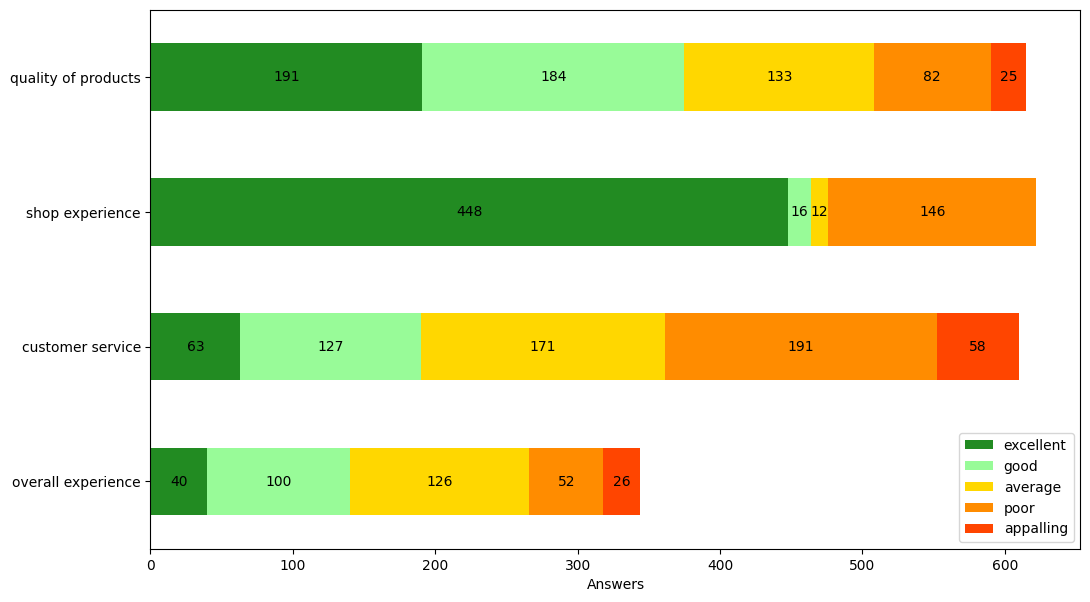

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as col

excellent = [191, 448, 63, 40]
good = [184, 16, 127, 100]
average = [133, 12, 171, 126]
poor = [82, 146, 191, 52]
appalling = [25, 0, 58, 26]



df = pd.DataFrame(data={'excellent': excellent, 'good': good, 'average': average, 'poor': poor, 'appalling': appalling})
df.index = ['quality of products', 'shop experience', 'customer service', 'overall experience']

cmap = ["#228B22", "#98FB98", "#FFD700", "#FF8C00", "#FF4500"]

ax = df.plot(kind='barh', stacked=True, figsize=(12, 7), rot=0, xlabel='Answers', ylabel='', color=cmap)
for c in ax.containers:
    
    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_width()) if v.get_width() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

plt.gca().invert_yaxis()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


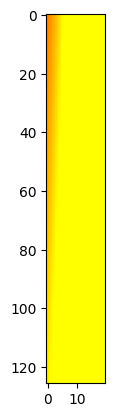

In [99]:
import numpy as np
import colorsys
import matplotlib.colors as col

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.rad2deg(np.arctan(y / x))
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(np.deg2rad(phi))
    y = rho * np.sin(np.deg2rad(phi))
    return(x, y)

def custom_hsv2rgb(h,s,v):
    return tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))

extent = (-1, 1, -2 * np.pi, 2 * np.pi)
delta=0.1
x = np.arange(extent[0], extent[1], delta)
y = np.arange(extent[2], extent[3], delta)

X, Y = np.meshgrid(x, y)

X_1 = np.exp(X) + np.cos(np.deg2rad(Y))
Y_1 = np.exp(X) + np.sin(np.deg2rad(Y))

rho,phi = cart2pol(X_1,Y_1)

height = 20
width = 126

one = np.ones((width, height))
res = []
for curr_x in range(width):
    tmp = []
    for curr_y in range(height):
        tmp.append([phi[curr_x][curr_y] / 180.0, one[curr_x][curr_y], rho[curr_x][curr_y]])
    res.append(tmp)

res = np.array(res)

plt.imshow(col.hsv_to_rgb(res))

plt.show()



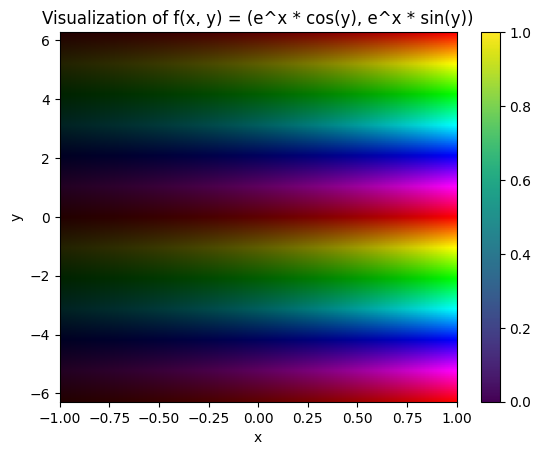

In [100]:
import numpy as np

x = np.linspace(-1, 1, 100)  # Define the x-values within the range [-1, 1]
y = np.linspace(-2*np.pi, 2*np.pi, 200)  # Define the y-values within the range [-2π, 2π]

X, Y = np.meshgrid(x, y)  # Create the Cartesian grid
Z = np.exp(X)  # Compute the exponential function for all points on the grid

# Translate to polar coordinates
Rad = Z  # Radius is given by the evaluated exponential values
Phi = np.mod(Y, 2*np.pi)  # Convert y to the range [0, 2π] using modulo operator
imgHSV = np.zeros(X.shape + (3,), dtype=np.double)  # Create the HSV image array

# Set hue to the angle (Phi)
imgHSV[:, :, 0] = Phi / (2*np.pi)

# Set saturation to 1
imgHSV[:, :, 1] = 1.0

# Set value according to the radius (Rad)
maxRad = np.max(Rad)  # Get the maximum radius value
imgHSV[:, :, 2] = np.minimum(Rad / maxRad, 1.0)  # Scale radius and clamp values larger than 1 to 1
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Convert HSV image to RGB
imgRGB = colors.hsv_to_rgb(imgHSV)

# Display the resulting image
plt.imshow(imgRGB, extent=(-1, 1, -2*np.pi, 2*np.pi), aspect='auto')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of f(x, y) = (e^x * cos(y), e^x * sin(y))')
plt.colorbar()
plt.show()
